In [3]:
import pandas as pd

In [4]:
x = pd.read_csv('/content/smartphone_battery_features.csv')
y = pd.read_csv('/content/smartphone_battery_targets.csv')

In [5]:
x.head()

,Device_ID,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index
0,207dd94c-0430-43aa-b388-4893447e628e,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,Medium,Poor,4,10.0,4.04
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,Medium,Good,7,10.0,4.23
2,b4adca05-564f-4b70-ab69-e8d66e656463,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,Medium,Good,6,10.0,2.21
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,Medium,Good,8,10.0,3.13
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,High,Good,5,10.0,4.95


In [6]:
x.columns

Index(['Device_ID', 'device_age_months', 'battery_capacity_mah',
       'avg_screen_on_hours_per_day', 'avg_charging_cycles_per_week',
       'avg_battery_temp_celsius', 'fast_charging_usage_percent',
       'overnight_charging_freq_per_week', 'gaming_hours_per_week',
       'video_streaming_hours_per_week', 'background_app_usage_level',
       'signal_strength_avg', 'charging_habit_score', 'usage_intensity_score',
       'thermal_stress_index'],
      dtype='object')

In [7]:
y

,Device_ID,current_battery_health_percent,recommended_action
0,207dd94c-0430-43aa-b388-4893447e628e,32.8,Change Phone
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,50.3,Replace Battery
2,b4adca05-564f-4b70-ab69-e8d66e656463,66.1,Replace Battery
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,46.8,Change Phone
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,67.2,Replace Battery
...,...,...,...
4995,39b2fb64-26ad-4c44-9373-758ef3761740,89.1,Keep Using
4996,708e9ce1-193f-415e-a1f1-8bbe6528cec1,50.8,Replace Battery
4997,6ce90202-2b2a-46e8-b313-936f2b5f32da,51.2,Replace Battery
4998,a289b415-2c3e-4cea-b987-6224987f4b1b,78.1,Keep Using


In [8]:
y.groupby("recommended_action")["current_battery_health_percent"].min()

,current_battery_health_percent
recommended_action,
Change Phone,10.0
Keep Using,75.0
Replace Battery,50.0


In [9]:
def recommend_action(health):
    if health >= 75:
        return "Keep Using"
    elif health >= 50:
        return "Replace Battery"
    else:
        return "Change Phone"

In [10]:
df = pd.merge(
    x,
    y,
    on="Device_ID",
    how="inner"
)

In [11]:
df["rule_action"] = df["current_battery_health_percent"].apply(recommend_action)

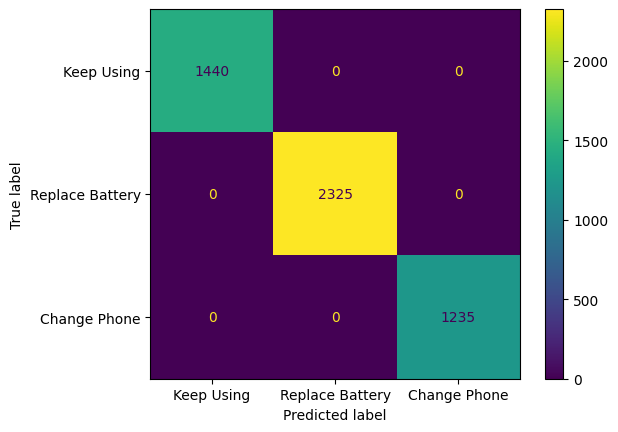

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    df["recommended_action"],
    df["rule_action"],
    labels=["Keep Using", "Replace Battery", "Change Phone"]
)

ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Keep Using", "Replace Battery", "Change Phone"]
).plot()


In [13]:

from sklearn.decomposition import PCA
import numpy as np

In [14]:
np.random.seed(42)

In [15]:
x.drop('Device_ID', axis = 1, inplace = True)

In [16]:
y.drop(['Device_ID','recommended_action' ], axis = 1, inplace = True)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

num_cols = [
    "device_age_months",
    "battery_capacity_mah",
    "avg_screen_on_hours_per_day",
    "avg_charging_cycles_per_week",
    "avg_battery_temp_celsius",
    "fast_charging_usage_percent",
    "overnight_charging_freq_per_week",
    "gaming_hours_per_week",
    "video_streaming_hours_per_week",
    "charging_habit_score",
    "usage_intensity_score",
    "thermal_stress_index"
]

cat_cols = [
    "background_app_usage_level",
    "signal_strength_avg"
]

preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

pipeline = Pipeline(
    [
        ("preprocess", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=10,
            random_state=42
        ))
    ]
)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [19]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['device_age_months',
                                                   'battery_capacity_mah',
                                                   'avg_screen_on_hours_per_day',
                                                   'avg_charging_cycles_per_week',
                                                   'avg_battery_temp_celsius',
                                                   'fast_charging_usage_percent',
                                                   'overnight_charging_freq_per_week',
                                                   'gaming_hours_per_week',
                                                   'video_streaming_hours_per_week',
                                                   'charging_habit_score',
                                                   'usage_intensity_score',
                                                   'thermal_stress_index']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['background_app_usage_level',
                                                   'signal_strength_avg'])])),
                ('model',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = pipeline.predict(X_test)

print('Random Forest, n_estimators=300')
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Random Forest, n_estimators=300
MAE: 3.13851
R²: 0.9502258998551916


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = pipeline.predict(X_test)

print('Random Forest, n_estimators=150')
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Random Forest, n_estimators=150
MAE: 3.13851
R²: 0.9502258998551916


In [22]:
y_pred = pipeline.predict(X_test)

print('Random Forest, n_estimators=10')
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Random Forest, n_estimators=10
MAE: 3.13851
R²: 0.9502258998551916


In [23]:
from sklearn.linear_model import LinearRegression
lr_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knn_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", KNeighborsRegressor(n_neighbors=5))
])

In [25]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        random_state=42
    ))
])

In [26]:
pipelines = {
    "Linear Regression": lr_pipeline,
    "KNN": knn_pipeline,
    "XGBoost": xgb_pipeline
}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} -> MAE: {mae:.3f}, R²: {r2:.3f}")

Linear Regression -> MAE: 3.679, R²: 0.930
KNN -> MAE: 5.453, R²: 0.847
XGBoost -> MAE: 2.724, R²: 0.963


XGBOOST gives the best result



let's choose best params for it

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBRegressor
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.1, 0.2],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    scoring='r2',       # or 'neg_mean_squared_error' for regression
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # use all cores
    verbose=2
)

# Fit to your training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best R^2 Score: 0.965315842628479


In [29]:
import joblib

joblib.dump(grid_search.best_estimator_, "battery_health_xgb_pipeline.pkl")

['battery_health_xgb_pipeline.pkl']